# Measurement of an Acoustic Impulse Response

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the masters module Selected Topics in Audio Signal Processing, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Introduction

The propagation of sound from one position (e.g. transmitter) to another (e.g. receiver) conforms reasonable well to the properties of a linear time-invariant (LTI) system. Consequently, the impulse response $h[k]$ characterizes the propagation of sound between theses two positions. Impulse responses have various applications in acoustics. For instance as [head-related impulse responses](https://en.wikipedia.org/wiki/Head-related_transfer_function) (HRIRs) or room impulse responses (RIRs) for the characterization of room acoustics. 

The following example demonstrates how an acoustic transfer function can be estimated by spectral divison using the soundcard of a computer. The module [`sounddevice`](http://python-sounddevice.readthedocs.org/) provides access to the soundcard via [`portaudio`](http://www.portaudio.com/).

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import sounddevice as sd

## Generation of the Measurement Signal

We generate a linear sweep as measurement signal

In [2]:
fs = 44100  # sampling rate
T = 5  # length of the measurement signal in sec
Tr = 2  # length of the expected system response in sec

t = np.linspace(0, T, T*fs)
x = sig.chirp(t, 20, T, 20000, 'linear', phi=90)
x = 0.9 * x / np.max(np.abs(x))

## Playback of Measurement Signal and Recording of Room Response

The measurement signal $x[k]$ is played through the output of the soundcard and the response $y[k]$ is captured synchronously by the input of the soundcard. The length of the played/captured signal has to be of equal length when using the soundcard. The measurement signal $x[k]$ is zero-padded so that the captured signal $y[k]$ includes the complete system response.

Please be careful with the volume of your speakers. Start with a very low volume and increase until a reasonable microphone level is reached. This holds especially for the low and high frequencies which can damage your speakers at high levels. After both the loudspeaker and microphone levels are set, repeat the recording with fixed settings.

In [3]:
x = np.concatenate((x, np.zeros(Tr*fs)))
y = sd.playrec(x, fs, channels=1)
sd.wait()
y = np.squeeze(y)

print('Playback level: ', 20*np.log10(max(x)), ' dB')
print('Input level: ', 20*np.log10(max(y)), ' dB')

Playback level:  -0.915149812185  dB
Input level:  -3.48441469552  dB


## Computation of the Acoustic Impulse Response

The impulse response is computed by spectral division $h[k] = \text{IDFT}_N \left\{ \frac{ \text{DFT}_N \{ y[k] \}}{\text{DFT}_N \{ x[k] \}} \right\} $

In [4]:
H = np.fft.rfft(y) / np.fft.rfft(x)
h = np.fft.irfft(H)

h = h[0:Tr*fs]

and plotted for illustration

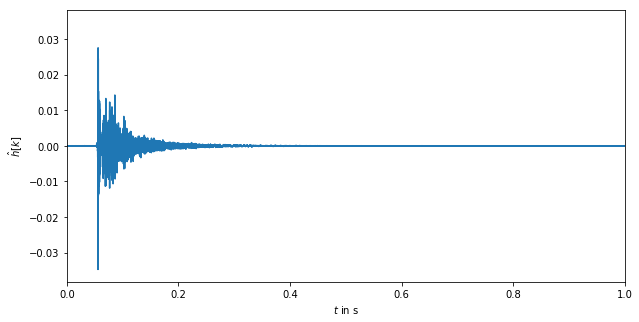

In [5]:
plt.figure(figsize=(10, 5))
t = 1/fs * np.arange(len(h))
plt.plot(t, h)
plt.axis([0.0, 1.0, -1.1*np.max(np.abs(h)), 1.1*np.max(np.abs(h))])
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$\hat{h}[k]$');

**Copyright**

This notebook is provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text/images/data are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Selected Topics in Audio Signal Processing - Supplementary Material, 2017*.